# Brandon Vasquez

### The following work was done without collaboration from other peers within the class but with aid from the SciKit library documentation page for the various methods, variables, and functions that could be used.

## Sources used (among the documentation of the various libraries included):
* [Plot multi-class SGD on the iris dataset from SciKit Documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html)



In [51]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [52]:
iris_data = datasets.load_iris()
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

match_targets = np.array([iris_data.target_names[target] for target in iris_data.target]) # match each target name to the respective target index
iris_df = pd.DataFrame(iris_data.data, columns=features, index=match_targets)

loss_functions = ['hinge','squared_hinge', 'log_loss', 'perceptron'] #loss functions to use

tested_features = { #will hold the scores of the four combinations we test with the 4 loss functions we test for discussion results.
    "Petal Width, Sepal Width": [], 
    "Petal Width, Petal Length": [],
    "Petal Length, Petal Width, Sepal Length": [],
    "Petal Length, Petal Width, Sepal Length, Sepal Width": []
}

print(iris_df)
print(match_targets, len(match_targets))


           Sepal Length  Sepal Width  Petal Length  Petal Width
setosa              5.1          3.5           1.4          0.2
setosa              4.9          3.0           1.4          0.2
setosa              4.7          3.2           1.3          0.2
setosa              4.6          3.1           1.5          0.2
setosa              5.0          3.6           1.4          0.2
...                 ...          ...           ...          ...
virginica           6.7          3.0           5.2          2.3
virginica           6.3          2.5           5.0          1.9
virginica           6.5          3.0           5.2          2.0
virginica           6.2          3.4           5.4          2.3
virginica           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa

# Helper Functions

In [53]:
def construct_X (features: list[str]) -> list[float]:return iris_df[features].to_numpy() #extract the features from the dataframe and drop indices and column title

def fit_and_plot_2d(clf, X, y, xlabel, ylabel, tst_ft): #fit to the classifier and plot on 2d scatter plot
    clf.fit(X, y) #train the model on the data
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.Paired,
        ax=plt.gca(),
        response_method="predict",
        xlabel=xlabel,
        ylabel=ylabel,
    )

    #plot the data we used in training
    for species, color in zip(clf.classes_, ["lightblue", "red", "brown"]):
        idx = np.where(match_targets == species)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            edgecolor="black",
            label=species,
            s=20,
        )
    tested_features[tst_ft].append(round(clf.score(X, y),3))
    plt.title(f'loss function: {lf} with score {round(clf.score(X, y), 3)}')
    plt.legend()
    plt.show()

# Two Features (Petal Width vs Sepal Width)

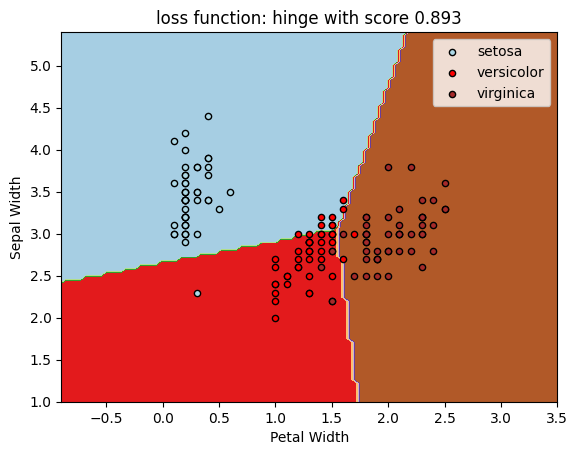

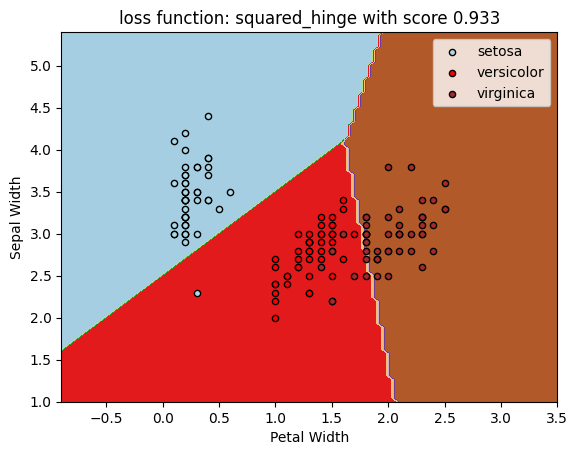

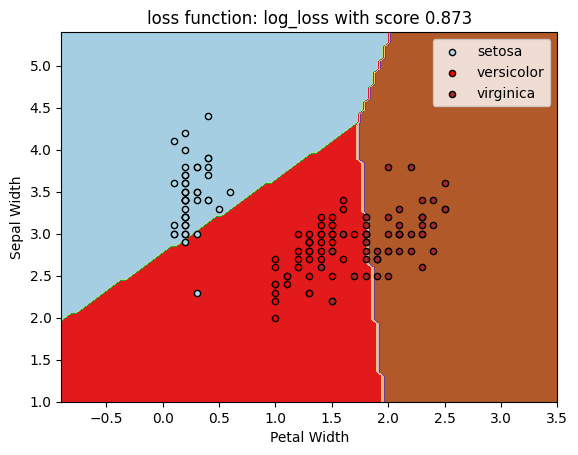

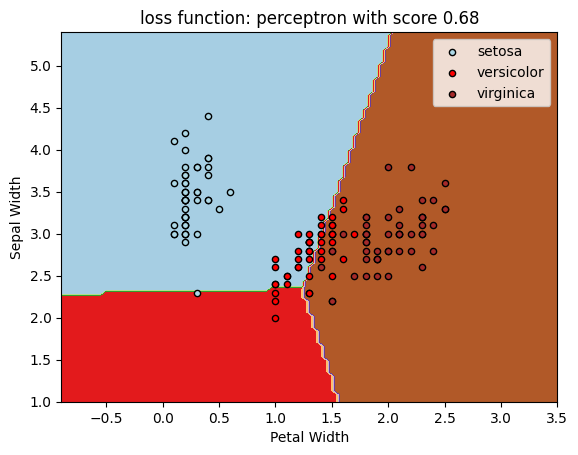

In [54]:
from collections.abc import Iterator

x_data = construct_X(['Petal Width', 'Sepal Width']) #construct X using the helper function
X, y = x_data, match_targets


#plot decision boundary area
for lf in loss_functions:
    fit_and_plot_2d(SGDClassifier(loss=lf, tol=1e-4, random_state=0), X, y, 'Petal Width', 'Sepal Width', "Petal Width, Sepal Width")


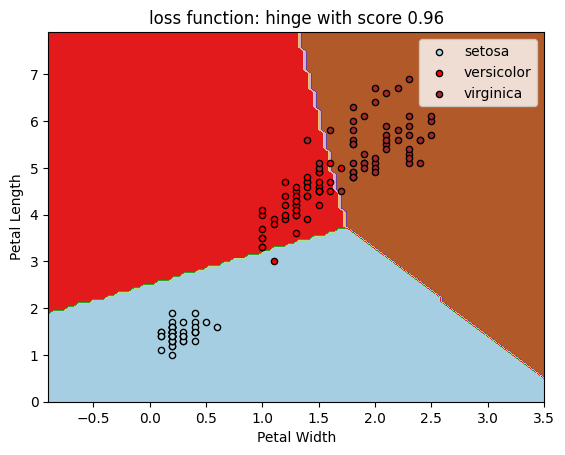

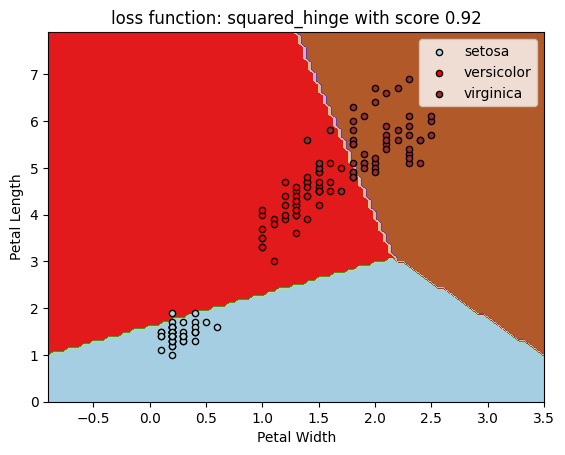

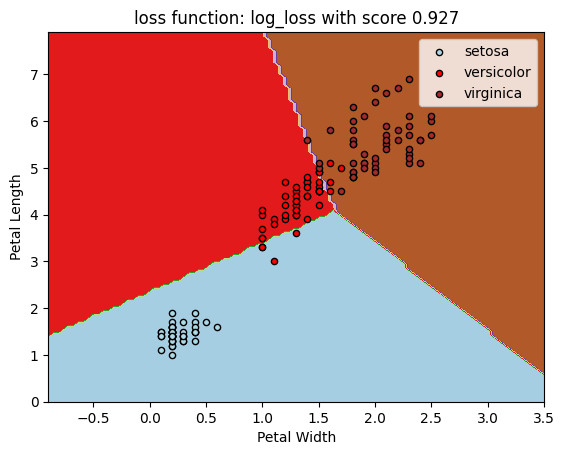

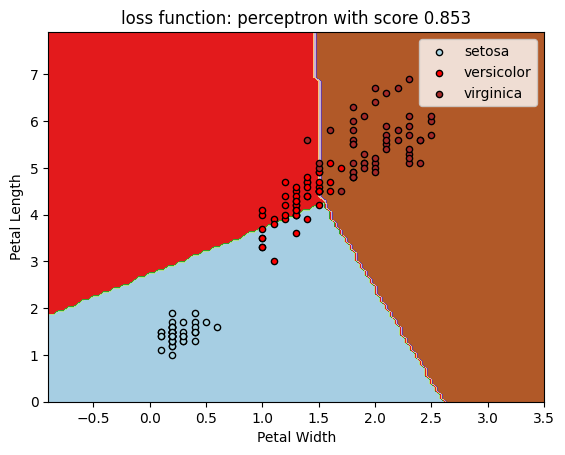

In [55]:
x_data = construct_X(['Petal Width', 'Petal Length']) #construct X using the helper function


X_2, y_2 = x_data, match_targets

for lf in loss_functions:
    fit_and_plot_2d(SGDClassifier(loss=lf, tol=1e-4, random_state=0), X_2, y_2, 'Petal Width', 'Petal Length', "Petal Width, Petal Length")

# Three Features (Petal Length, Petal Width, and Sepal Length)

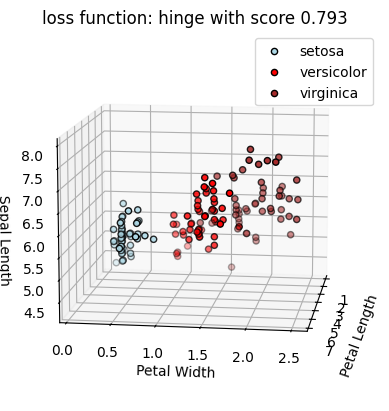

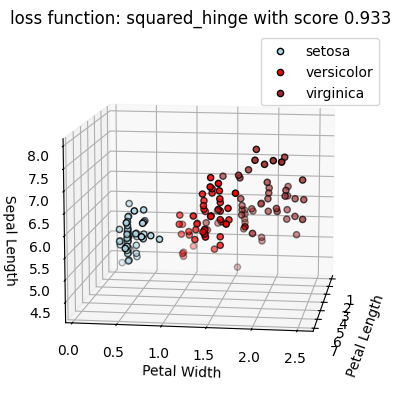

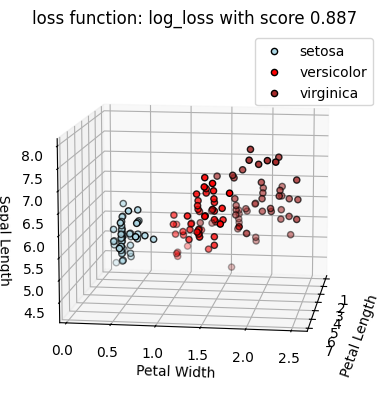

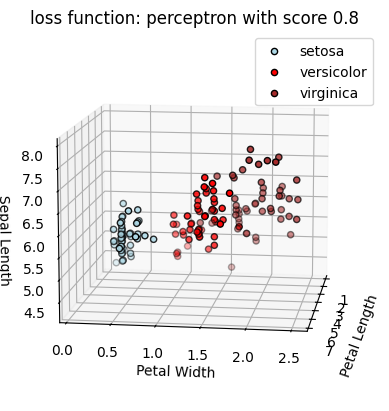

In [56]:
x_data = construct_X(['Petal Length', 'Petal Width', 'Sepal Length']) #construct X using the helper function
X_3, y_3 = x_data, match_targets

for lf in loss_functions:
    clf = SGDClassifier(loss=lf, tol=1e-4, random_state=0)
    clf.fit(X_3, y_3)
    #plot in 3D
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for  species, color in zip(clf.classes_, ["lightblue", "red", "brown"]):
        idx = np.where(match_targets == species)
        ax.scatter(
            X_3[idx, 0],
            X_3[idx, 1],
            X_3[idx, 2],
            c=color,
            edgecolor="black",
            label=species,
            s=20,
        )

    tested_features["Petal Length, Petal Width, Sepal Length"].append(round(clf.score(X_3, y_3),3))
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    ax.set_title(f'loss function: {lf} with score {round(clf.score(X_3, y_3), 3)}')
    ax.set_zlabel('Sepal Length')
    ax.view_init(elev=11, azim=8, )
    ax.legend()
    

# All of the features, using the perceptron loss function

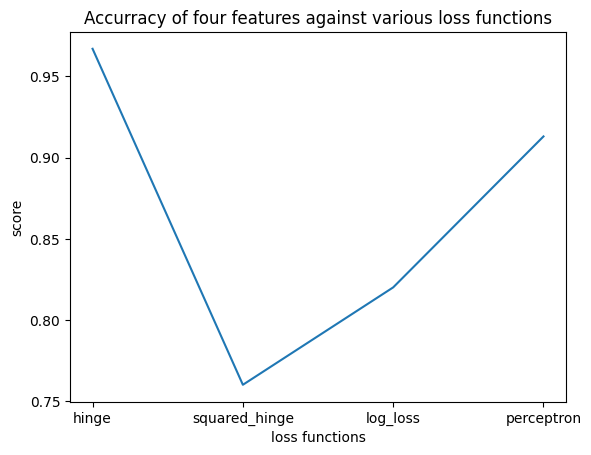

In [57]:
x_data = construct_X(['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width']) #construct X using the helper function
X_4, y_4 = x_data, match_targets
scores = []
for lf in loss_functions:
    clf = SGDClassifier(loss=lf, tol=1e-4, random_state=0).fit(X_4, y_4)
    scores.append(round(clf.score(X_4, y_4),3))
    tested_features["Petal Length, Petal Width, Sepal Length, Sepal Width"].append(round(clf.score(X_4, y_4),3))
plt.xlabel("loss functions")
plt.ylabel("score")
plt.plot(loss_functions , scores)
plt.title("Accurracy of four features against various loss functions")
plt.show()

[0.893, 0.933, 0.873, 0.68]
[0.96, 0.92, 0.927, 0.853]
[0.793, 0.933, 0.887, 0.8]
[0.967, 0.76, 0.82, 0.913]


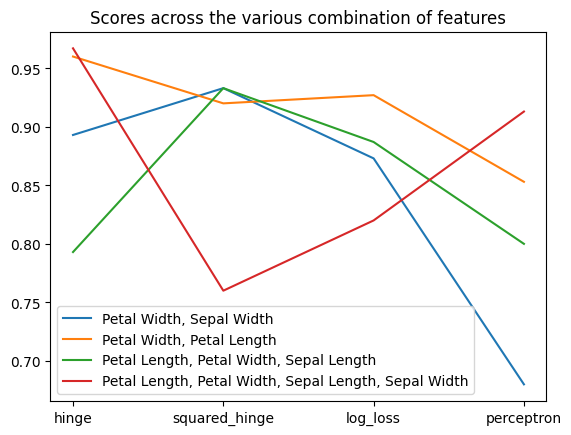

In [58]:
for test in tested_features:
    print(tested_features[test])
    plt.plot(loss_functions, tested_features[test], label=test)
plt.title("Scores across the various combination of features")
plt.legend()

# Discussion

## Large Delta of two feature classifications when using Perceptron loss function
* Choosing two distinct sets of features it was observed that the loss functions effect on the classifying the data drastically changed as observed in the 'Scores across the various # of features' it can be seen that when we compare the accurracy of the perceptron loss function on the two different sets of features this was where the greatest disparity was seen. When now reflecting on the plot featuring the decision regions of the respective classes we see that for the set consisting of the features 'Petal Width, Sepal Width' there was a gross misclassification for the Versicolor class where the plotted training points extend into the decision regions--not to be confused with the hyperplane--of both setosa and virginica. Now comparing this classification plot to that of the set with 'Petal Width, Petal Length' it can be observed that the higher score of the classification is due to the more accurate split of the decision regions where the training data--while still not completely linearly seperable. This delta between the two further shows the effect that linearly inseperable data has on the percetron loss function and thus the classifier as a whole.

## Accurracy Across the chosen combination of features...
* When looking across all of the features in the plot 'Scores across the various combination of features' tt is also noted that using the perceptron loss function on the three-feature combination as well as the two distinct two-feature combinations resulted in the lowest accuracy score, however, the four-feature combination exhibited the second highest accuracy score with the perceptron loss function. The highest accuracy score recorded using the four loss functions for the ‘Sepal Width, Petal Width’ two-feature and four-feature combination was using the hinge loss function meanwhile for the ‘Petal Width, Petal Length’ and the three-feature loss function the highest accuracy score was recorded with the squared hinge loss function. 

* Inclusively the 'Petal Width, Sepal Width' two-feature combination exhibited similar deltas in accurracy and even slightly converged on the loss function that resulted in the highest accuracy score for both--squared hinge--this could have possibly been due to the similarity in the distribution of the training data, when observing the 'loss function: squared_hinge with score 0.933' from the 3D plot of the three feature classification combination and the 'loss function: squared_hinge with score 0.933' in 2D featuring the 'Petal Width, Sepal Width' two-feature combination it can be observed that the distribution of the three species is quite similar with the setosa class being linearly seperable from the other two class meanwhile versicolor and virginica are not linearly seperable.







